**Imports the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

**Imports the csv file into a panda dataframe**

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

**Assigns the dataframe to target and features**

In [3]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

X for features so assigns every column except the target variable "Exited" which is assigned to y

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

**Label encoding to process the columns with strings into integers**

In [6]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Under samples the dominant class type**

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

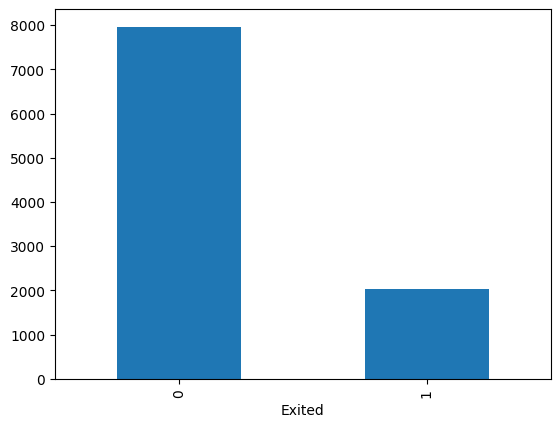

In [9]:
df.Exited.value_counts().plot(kind="bar")
plt.show()

The number of rows for each target variable is not equal which could cause the ML model to be bias towards the majority class

In [10]:
under_sampler = RandomUnderSampler(random_state=9)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)


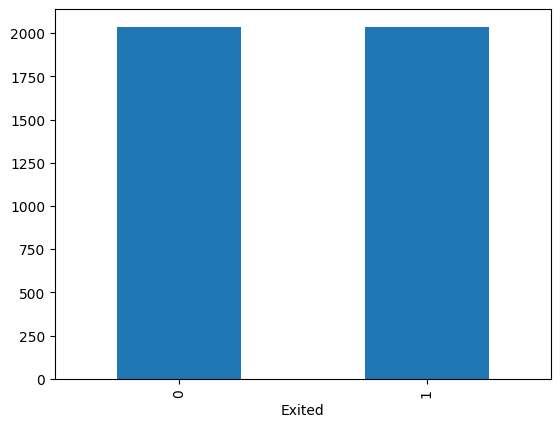

In [11]:
y_resampled.value_counts().plot(kind="bar")
plt.show()

In [12]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name="Exited")

df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

Under samples the majority class (Laptop would struggle with more records) and converts the values into a panda dataframe

In [13]:
columns_to_drop = ["RowNumber", "CustomerId", "Surname"]
df_stripped = df.drop(columns_to_drop, axis=1)
df_features = df_stripped.drop("Exited", axis=1)

Removes columns which wouldn't effect the target variables (Row number, customerID and surname)

**Creates histograms to check the distribution of data**

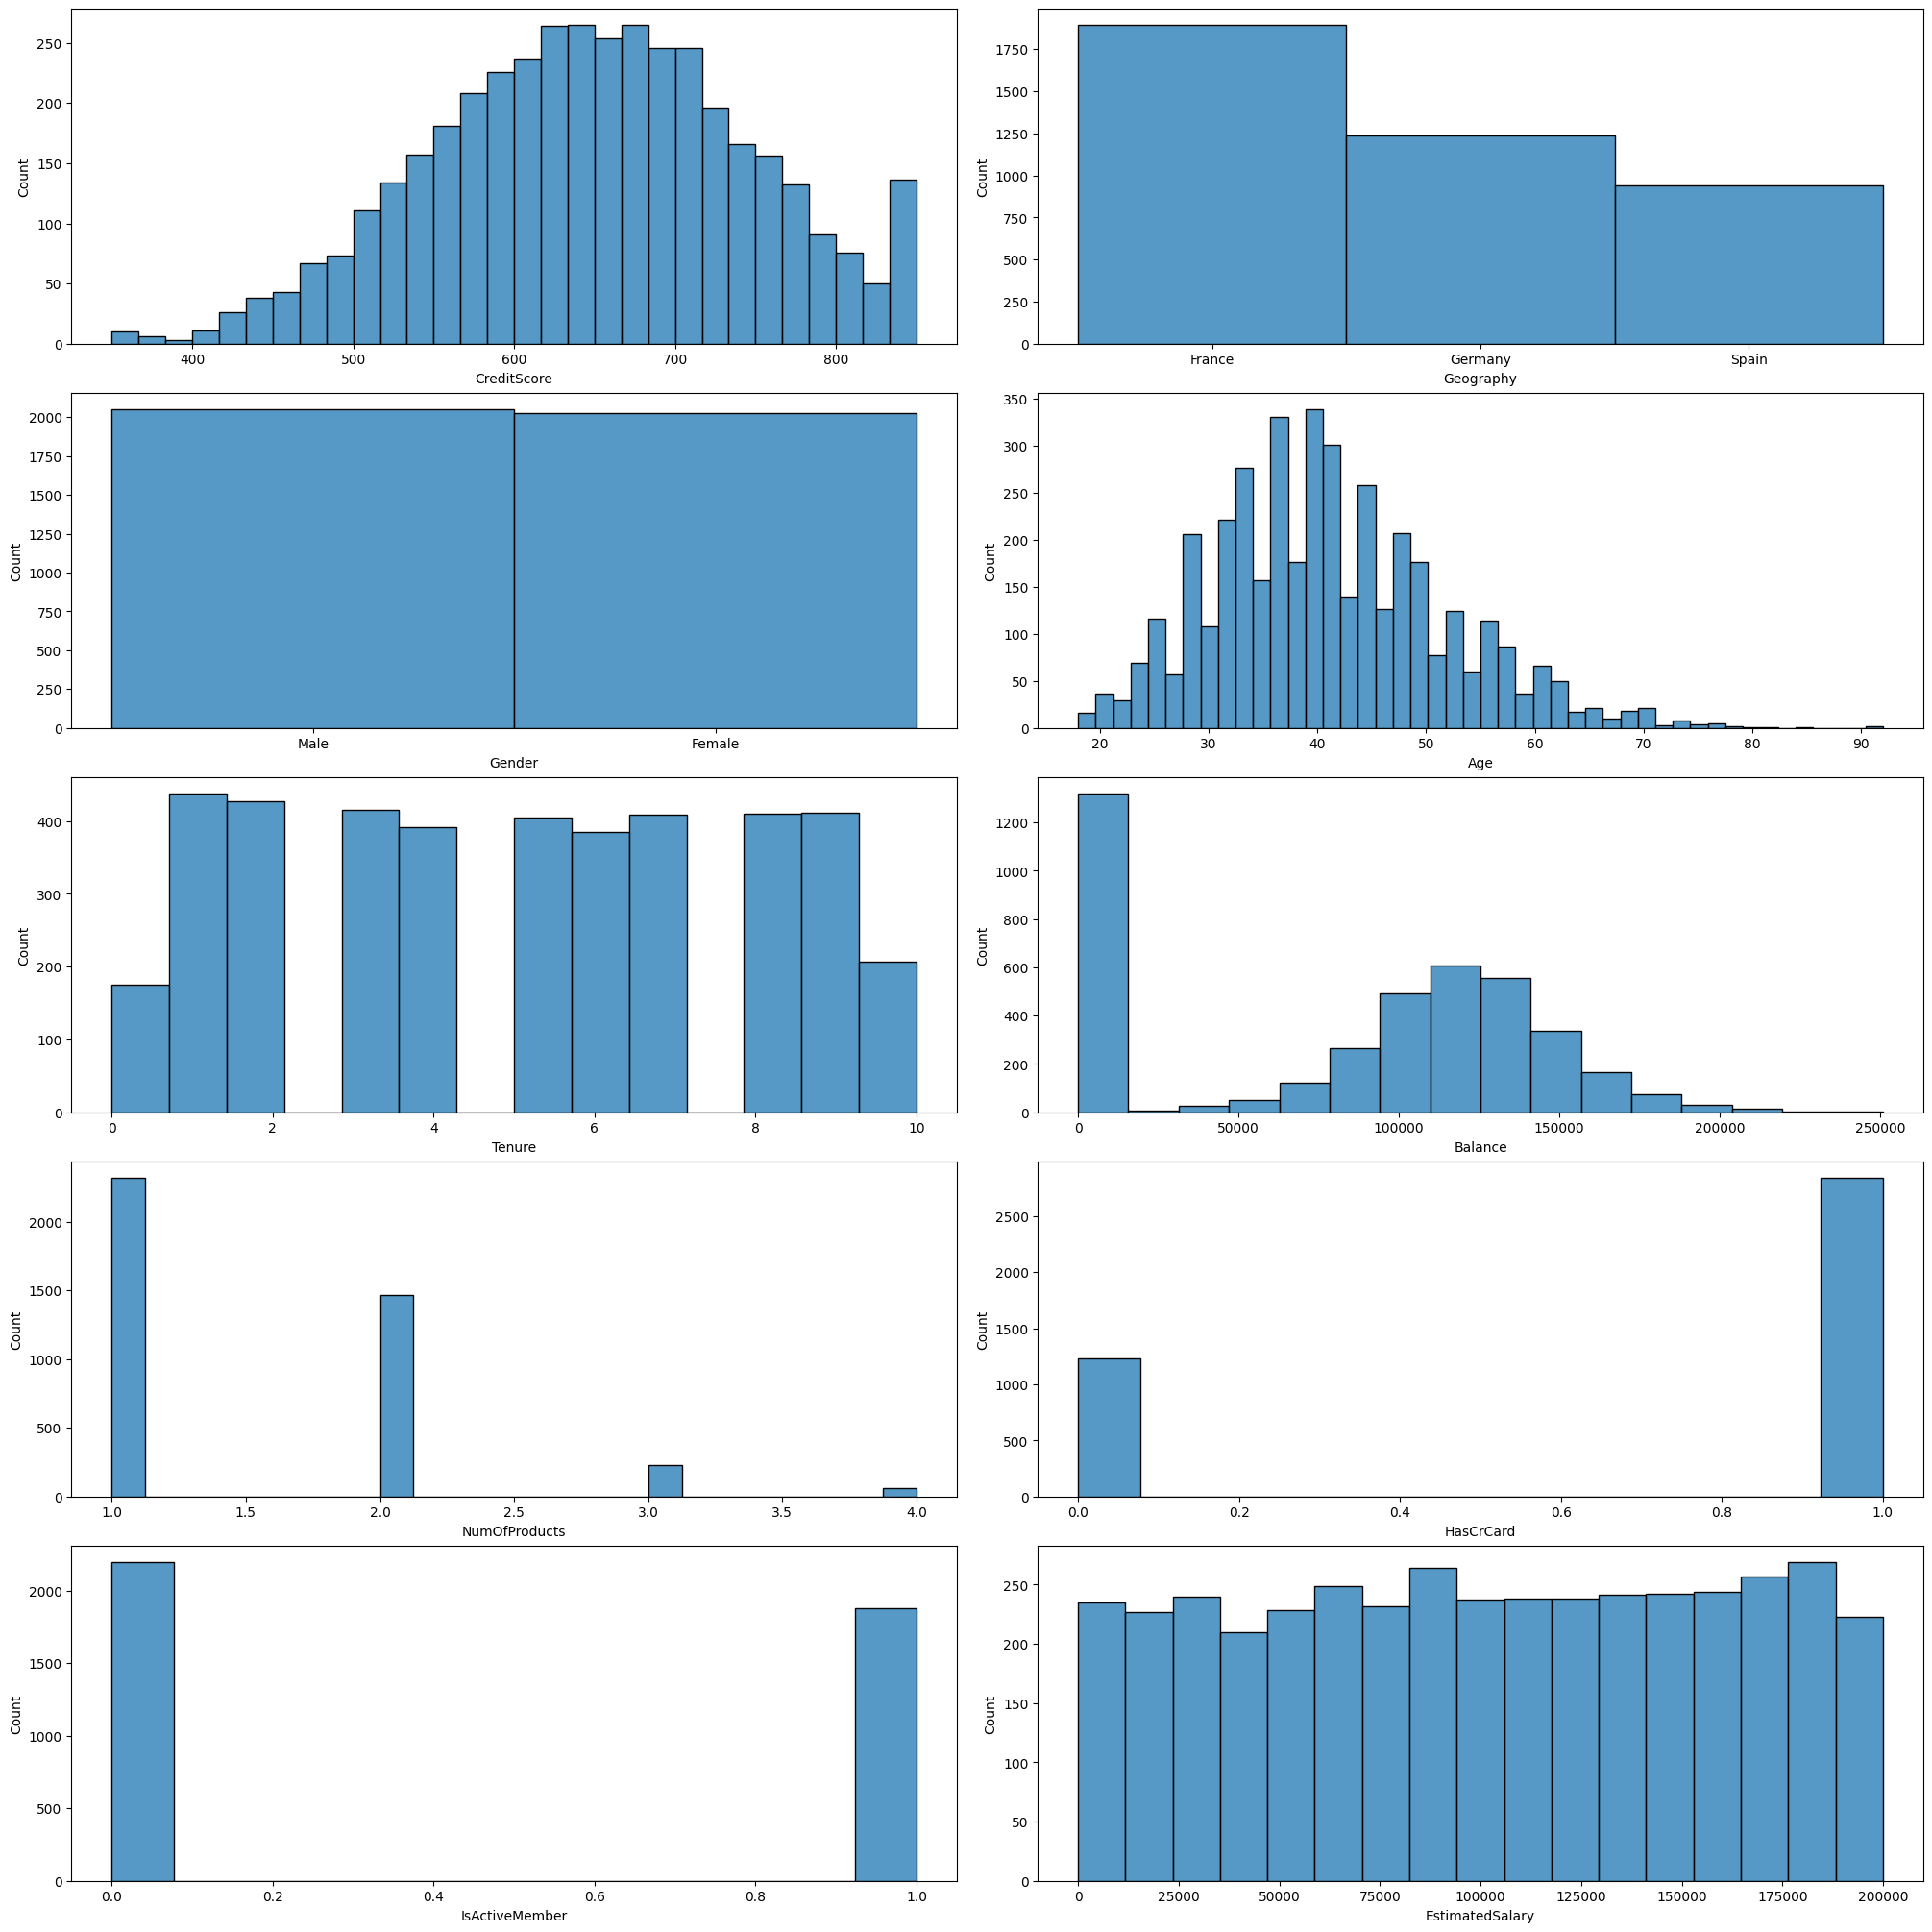

In [14]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)

i = j = 0

for column in numerical_cols:
    sns.histplot(df[column], ax=axes[i,j])
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

From these histograms we see:
- The geography column does not have equal values
- Many customers have a balance of 0
- Customers are more likely to havbe less products
- Many more customers have credit cards than those who do not
- There are slightly less inactive customers than active customers

**Checks the distribution of data between the binary classifications**

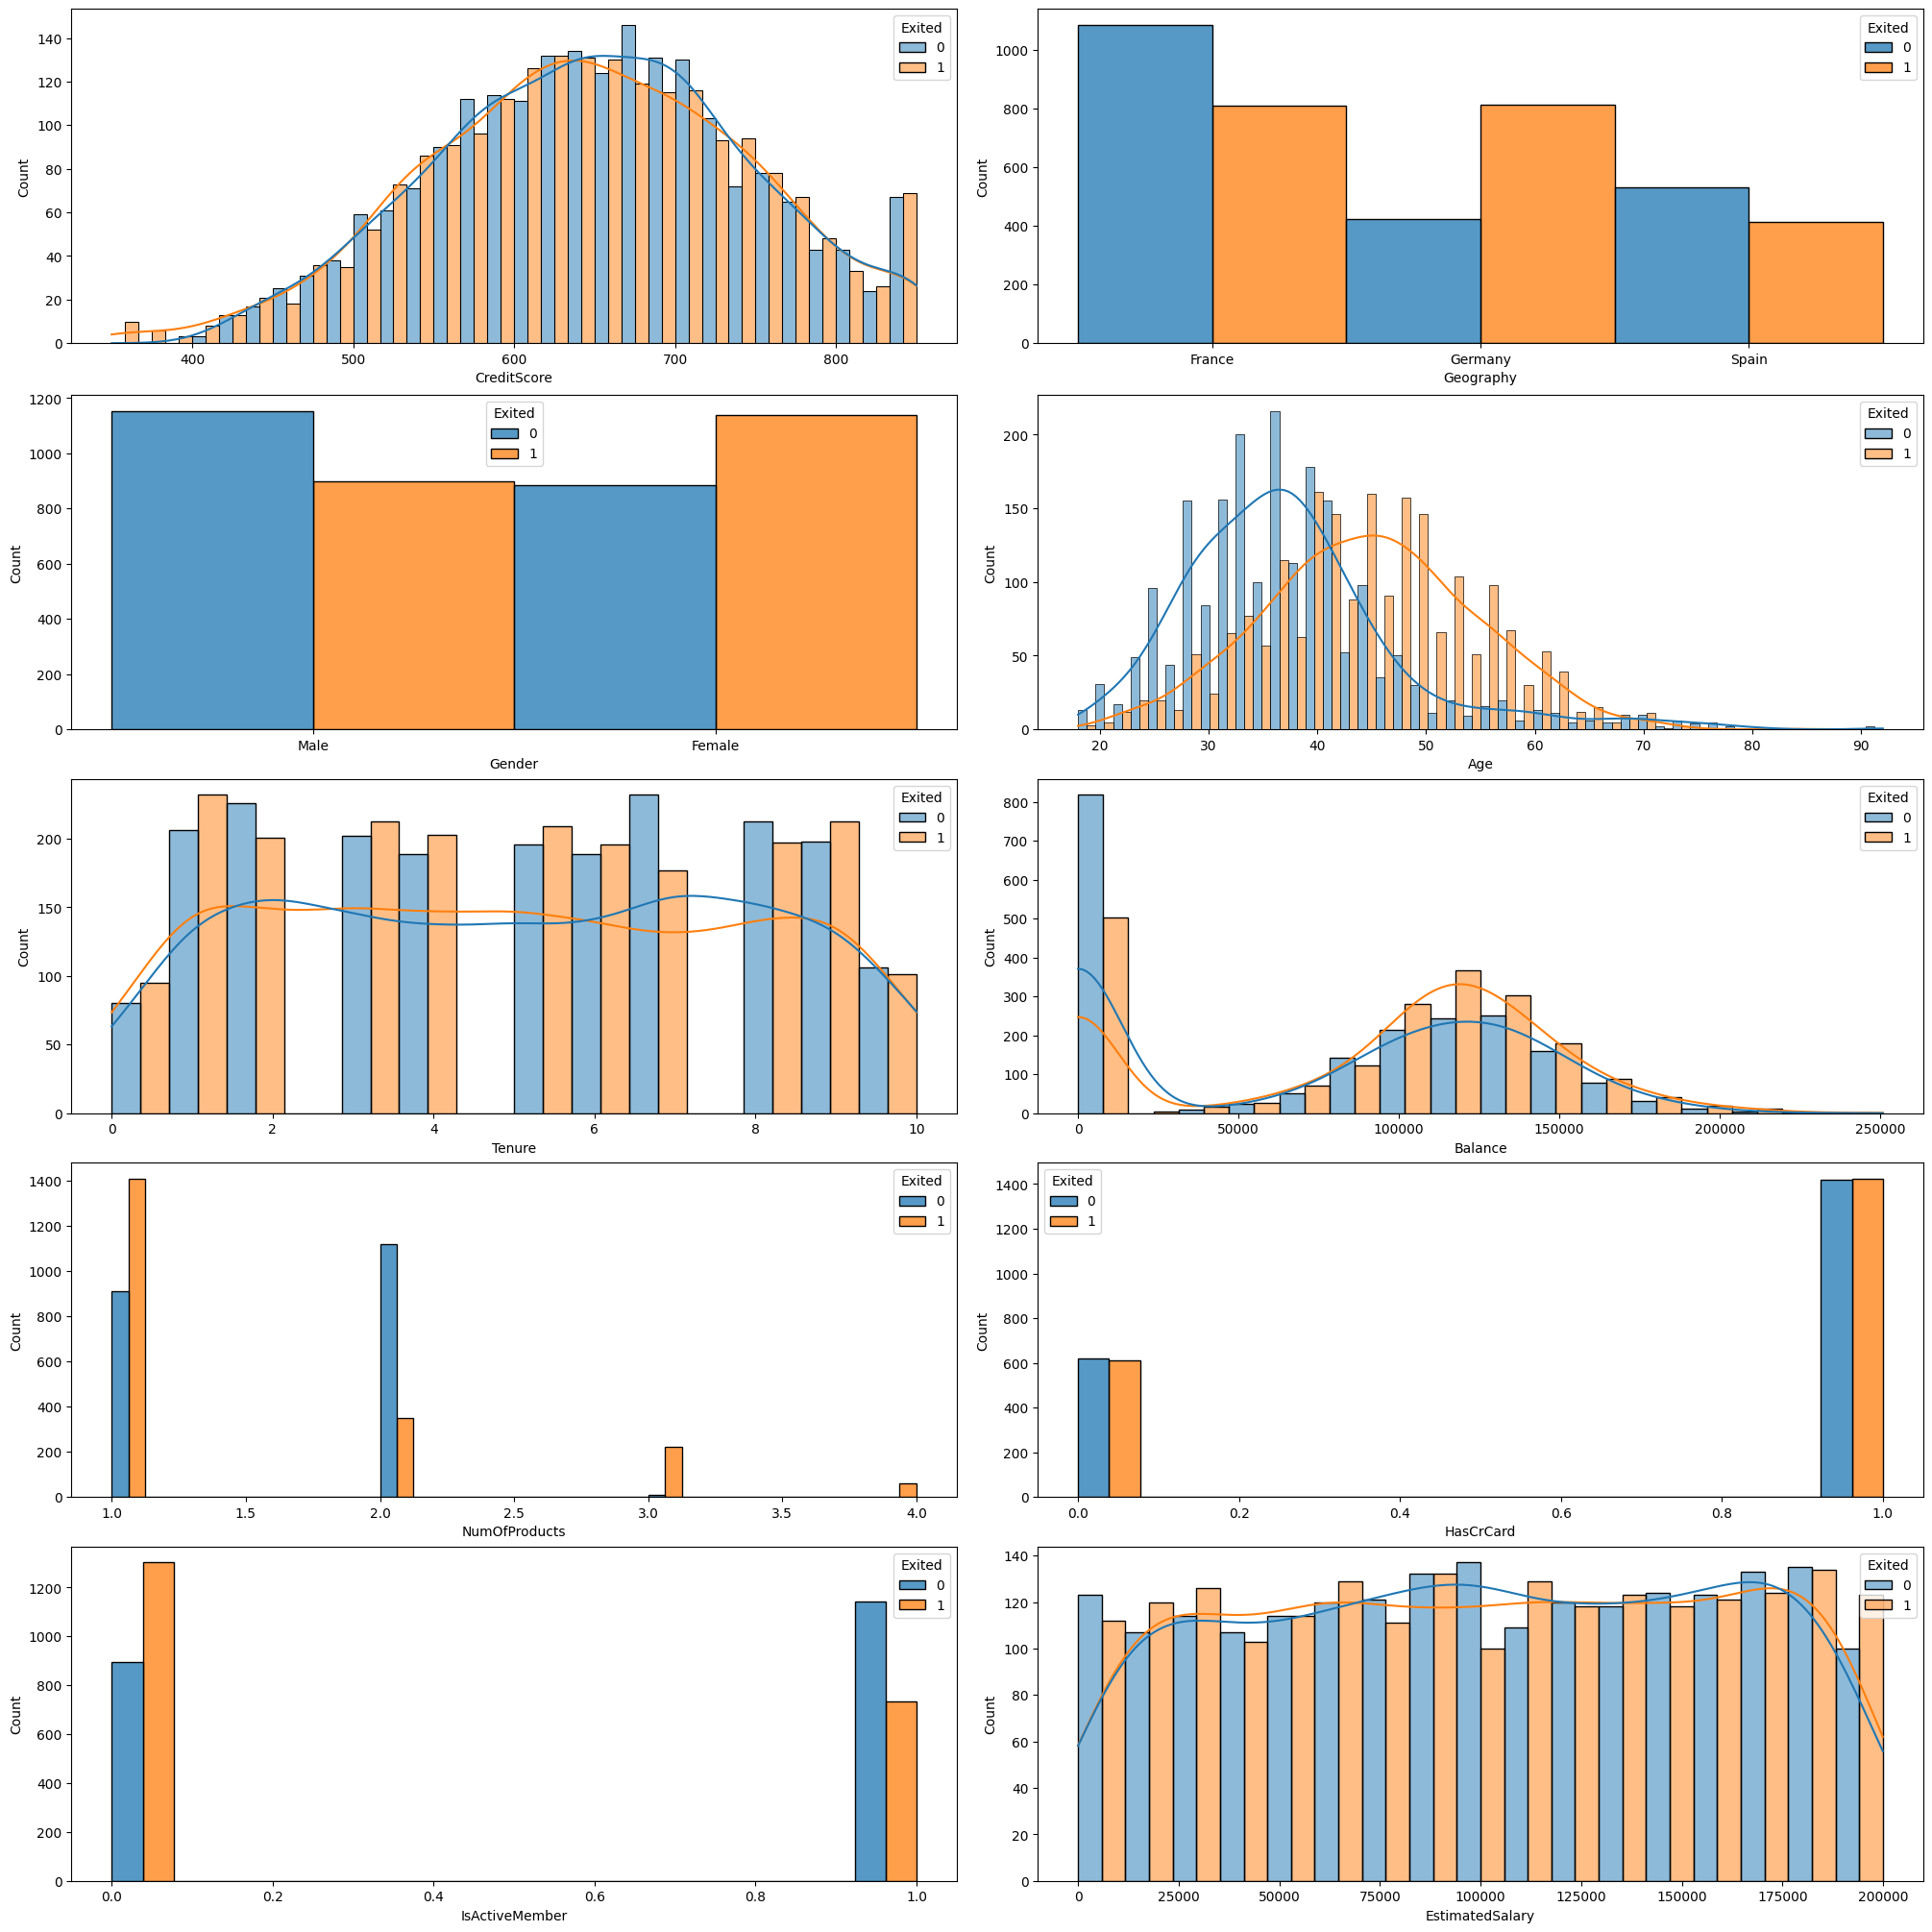

In [15]:
numerical_cols = df_features.columns.tolist()
figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,20), constrained_layout = True)
kde_for_column = [1, 0, 0, 1, 1, 1, 0, 0, 0, 1]  # Used to indicated whether a graph should have kde or not
iteration = 0
i = j = 0

for column in numerical_cols:
    sns.histplot(data=df, x=column, hue="Exited", ax=axes[i,j], multiple="dodge", kde=kde_for_column[iteration])

    iteration += 1
    
    if j == 1:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

Analysing these graphs, I can see that: 
- Customers from France and Spain are more likely to leave than customers from Germany
- Male customers are more likely to leave than female customers
- The older customers are, the more likely they are to leave
- Customers with higher balances are more likely to leave
- Customers with more than 2 products are more likely to stay
- Active customers are more likely to leave than non active customers

**Creates a correlation heatmap to check for Multicollinearity**

In [16]:
label_encoder = LabelEncoder()
df_stripped['Geography'] = label_encoder.fit_transform(df['Geography'])
df_stripped["Gender"] = label_encoder.fit_transform(df["Gender"])

Used to convert the columns with strings into numeric values so they can be used 

<function matplotlib.pyplot.show(close=None, block=None)>

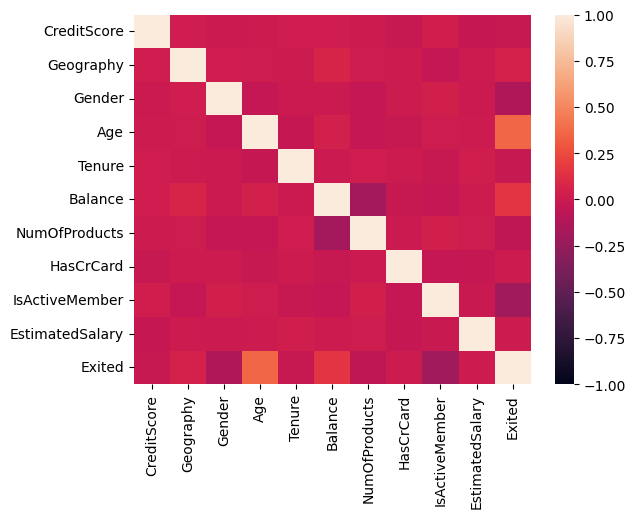

In [17]:
corr_matrix = df_stripped.corr()
sns.heatmap(corr_matrix, annot=False, vmin=-1, vmax=1)
plt.show

There are no columns with high correlation